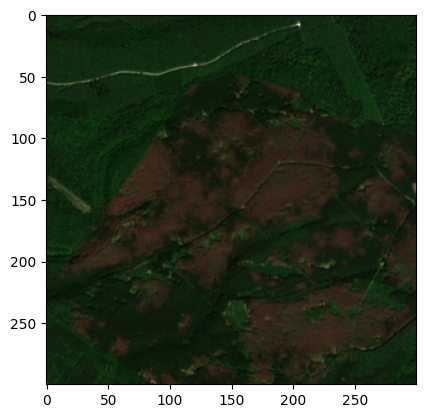

In [15]:
import rasterio 

#open the raster file
raster = rasterio.open('/Users/arthurcalvi/Data/aws/Grand_Est/tx=64,ty=-550/20200520/20200520_rgb.tif')

import matplotlib.pyplot as plt

#normalize and increase the gain of the image with the arg gain 
def normalize(array, gain=1, crop=[150, 450, 650, 950]):
    array = array[:, crop[0]:crop[1], crop[2]:crop[3]]
    array_min, array_max = array.min(), array.max()
    return ((((array - array_min) / (array_max - array_min)) * gain) * 255 ).astype('uint8')


#plot the raster file and the dynamic range of rgb channels
plt.imshow(normalize(raster.read()).transpose([1,2,0]), vmin=0, vmax=255)
plt.show()

In [21]:
profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 1008, 'height': 1008, 'count': 3, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 634800.0,
       0.0, -10.0, 5456080.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [22]:
import os 
os.makedirs('/Users/arthurcalvi/Data/test_images_gpt', exist_ok=True)


#save normalize image as png with rasterio in a new folder called test images
for image_path in ['/Users/arthurcalvi/Data/aws/Grand_Est/tx=64,ty=-550/20190602/20190602_rgb.tif', '/Users/arthurcalvi/Data/aws/Grand_Est/tx=64,ty=-550/20200520/20200520_rgb.tif']:
    with rasterio.open(image_path) as src:
        profile = src.profile
        profile.update(count=3)
        profile.update(dtype=rasterio.uint8)
        profile.update(driver='PNG')
        with rasterio.open(f'/Users/arthurcalvi/Data/test_images_gpt/{os.path.basename(image_path)[:-4]}.PNG', 'w', **profile) as dst:
            dst.write(normalize(src.read(), gain=1.5))


(array([2.52500e+03, 3.14190e+04, 5.75630e+05, 2.08686e+05, 6.55550e+04,
        4.20220e+04, 2.32390e+04, 1.06860e+04, 7.10200e+03, 5.78400e+03,
        4.31800e+03, 3.30400e+03, 2.81300e+03, 2.62200e+03, 2.67100e+03,
        2.25400e+03, 2.07900e+03, 1.92500e+03, 1.69100e+03, 1.55100e+03,
        1.57700e+03, 1.58300e+03, 1.69300e+03, 1.62500e+03, 1.49000e+03,
        1.37500e+03, 1.31200e+03, 1.18500e+03, 1.12800e+03, 1.10500e+03,
        1.02000e+03, 9.11000e+02, 9.03000e+02, 6.57000e+02, 3.67000e+02,
        1.42000e+02, 5.90000e+01, 1.30000e+01, 6.00000e+00, 5.00000e+00,
        5.00000e+00, 5.00000e+00, 6.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

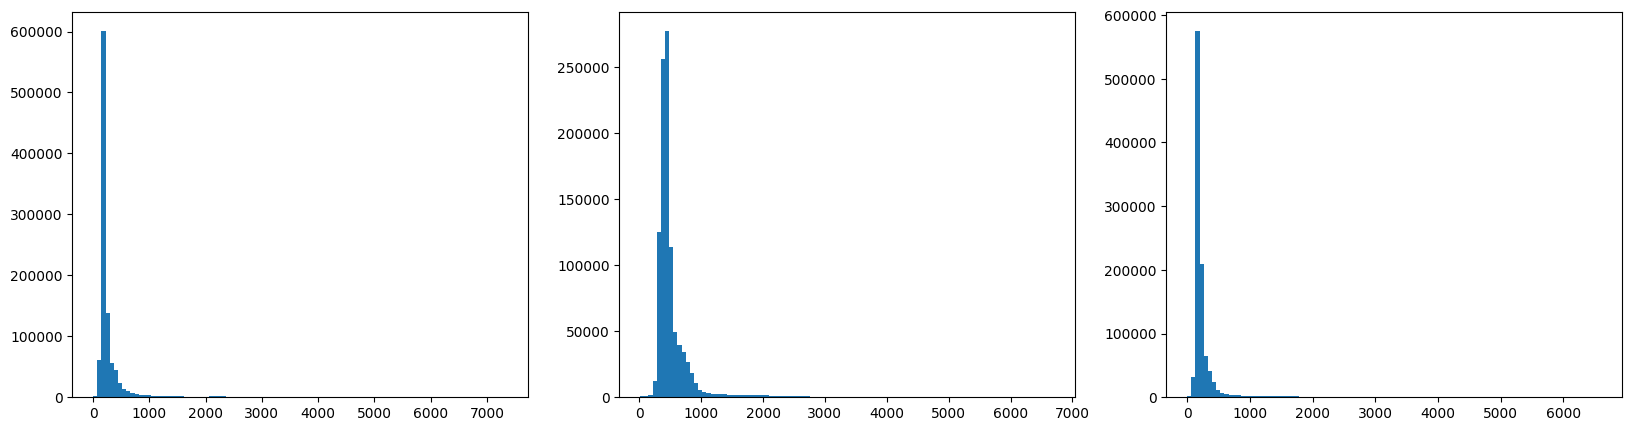

In [5]:
#plot histograms of channels R G b IN THE SAME FIGURE BUT DIFFERENT AXES
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(20,5))
axr.hist(raster.read(1).flatten(), bins=100)
axg.hist(raster.read(2).flatten(), bins=100)
axb.hist(raster.read(3).flatten(), bins=100)
